# Cluster Subsample:

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack

# Load

In [31]:
path_out = '/data/des61.a/data/johnny/DESY3/data/cutouts/'
fname_out= path_out+'y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.fits'


### Show DataStructure

In [32]:
ls /data/des81.b/data/mariaeli/y3_cats/subsampled

Y3_GOLD_2_2.1_BPZ_subsampled.h5
Y3_GOLD_2_2.1_DNF_subsampled.h5
Y3_GOLD_2_2_1_maps.h5
Y3_GOLD_2_2.1_subsampled.h5
y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.h5
Y3_mastercat_6_15_19_subsampled.h5
y3v02-mcal-003-v1_subsampled.h5


In [33]:
import h5py

path   = '/data/des81.b/data/mariaeli/y3_cats/subsampled/'
fname  = path+'y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.h5'

master = h5py.File(fname,'r')

In [34]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [35]:
master.visititems(show_h5_dataset)

(u'catalog/redmagic/combined_sample_fid/chisq', <HDF5 dataset "chisq": shape (357967,), type ">f4">)
(u'catalog/redmagic/combined_sample_fid/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (357967,), type "<i8">)
(u'catalog/redmagic/combined_sample_fid/dec', <HDF5 dataset "dec": shape (357967,), type ">f8">)
(u'catalog/redmagic/combined_sample_fid/mabs', <HDF5 dataset "mabs": shape (357967, 4), type ">f4">)
(u'catalog/redmagic/combined_sample_fid/mabs_err', <HDF5 dataset "mabs_err": shape (357967, 4), type ">f4">)
(u'catalog/redmagic/combined_sample_fid/model_mag', <HDF5 dataset "model_mag": shape (357967, 4), type ">f4">)
(u'catalog/redmagic/combined_sample_fid/model_magerr', <HDF5 dataset "model_magerr": shape (357967, 4), type ">f4">)
(u'catalog/redmagic/combined_sample_fid/ra', <HDF5 dataset "ra": shape (357967,), type ">f8">)
(u'catalog/redmagic/combined_sample_fid/redmagicflag', <HDF5 dataset "redmagicflag": shape (357967,), type "|u1">)
(u'catalog/redmagic/combined_samp

(u'catalog/redmapper/lgt20/ncent_good', <HDF5 dataset "ncent_good": shape (2289,), type ">i2">)
(u'catalog/redmapper/lgt20/ncross', <HDF5 dataset "ncross": shape (2289,), type ">i2">)
(u'catalog/redmapper/lgt20/p_bcg', <HDF5 dataset "p_bcg": shape (2289, 5), type ">f4">)
(u'catalog/redmapper/lgt20/p_c', <HDF5 dataset "p_c": shape (2289, 5), type ">f4">)
(u'catalog/redmapper/lgt20/p_cen', <HDF5 dataset "p_cen": shape (2289, 5), type ">f4">)
(u'catalog/redmapper/lgt20/p_fg', <HDF5 dataset "p_fg": shape (2289, 5), type ">f4">)
(u'catalog/redmapper/lgt20/p_sat', <HDF5 dataset "p_sat": shape (2289, 5), type ">f4">)
(u'catalog/redmapper/lgt20/pz', <HDF5 dataset "pz": shape (2289, 21), type ">f4">)
(u'catalog/redmapper/lgt20/pzbins', <HDF5 dataset "pzbins": shape (2289, 21), type ">f4">)
(u'catalog/redmapper/lgt20/q_cen', <HDF5 dataset "q_cen": shape (2289, 5), type ">f4">)
(u'catalog/redmapper/lgt20/q_miss', <HDF5 dataset "q_miss": shape (2289,), type ">f4">)
(u'catalog/redmapper/lgt20/r_lam

(u'masks/redmagic/highdens/fracgood', <HDF5 dataset "fracgood": shape (2648854,), type ">f4">)
(u'masks/redmagic/highdens/hpix', <HDF5 dataset "hpix": shape (2648854,), type ">i8">)
(u'masks/redmagic/highdens/maskfrac_est', <HDF5 dataset "maskfrac_est": shape (2648854,), type ">f4">)
(u'masks/redmagic/highdens/zmax', <HDF5 dataset "zmax": shape (2648854,), type ">f4">)
(u'masks/redmagic/higherlum/fracgood', <HDF5 dataset "fracgood": shape (2648854,), type ">f4">)
(u'masks/redmagic/higherlum/hpix', <HDF5 dataset "hpix": shape (2648854,), type ">i8">)
(u'masks/redmagic/higherlum/maskfrac_est', <HDF5 dataset "maskfrac_est": shape (2648854,), type ">f4">)
(u'masks/redmagic/higherlum/zmax', <HDF5 dataset "zmax": shape (2648854,), type ">f4">)
(u'masks/redmagic/highlum/fracgood', <HDF5 dataset "fracgood": shape (2648854,), type ">f4">)
(u'masks/redmagic/highlum/hpix', <HDF5 dataset "hpix": shape (2648854,), type ">i8">)
(u'masks/redmagic/highlum/maskfrac_est', <HDF5 dataset "maskfrac_est": s

In [36]:
master['catalog/redmapper/lgt20/'].visititems(show_h5_dataset)

(u'bcg_ilum', <HDF5 dataset "bcg_ilum": shape (2289,), type ">f4">)
(u'bcg_spec_z', <HDF5 dataset "bcg_spec_z": shape (2289,), type ">f4">)
(u'c_lambda', <HDF5 dataset "c_lambda": shape (2289, 3), type ">f4">)
(u'c_lambda_err', <HDF5 dataset "c_lambda_err": shape (2289, 3), type ">f4">)
(u'chisq', <HDF5 dataset "chisq": shape (2289,), type ">f4">)
(u'dec', <HDF5 dataset "dec": shape (2289,), type ">f8">)
(u'dec_cent', <HDF5 dataset "dec_cent": shape (2289, 5), type ">f8">)
(u'dec_orig', <HDF5 dataset "dec_orig": shape (2289,), type ">f8">)
(u'dlambda_dz', <HDF5 dataset "dlambda_dz": shape (2289,), type ">f4">)
(u'dlambda_dz2', <HDF5 dataset "dlambda_dz2": shape (2289,), type ">f4">)
(u'dlambdavar_dz', <HDF5 dataset "dlambdavar_dz": shape (2289,), type ">f4">)
(u'dlambdavar_dz2', <HDF5 dataset "dlambdavar_dz2": shape (2289,), type ">f4">)
(u'ebv_mean', <HDF5 dataset "ebv_mean": shape (2289,), type ">f4">)
(u'geomaskfrac', <HDF5 dataset "geomaskfrac": shape (2289,), type ">f4">)
(u'id_ce

### Load Variables

In [37]:
clusters = master['catalog/redmapper/lgt5/']

In [38]:
cols = ['RA','DEC','Z_LAMBDA','LAMBDA_CHISQ','LAMBDA_CHISQ_E','SCALEVAL']

ra   = clusters['ra'][:]
dec  = clusters['dec'][:]
zcls = clusters['z_lambda'][:]

lbd     = clusters['lambda_chisq'][:]
lbd_e   = clusters['lambda_chisq_e'][:]
scale_v = clusters['scaleval'][:]

mmag    = clusters['members/model_mag'][:]
zgal    = clusters['members/z'][:]
master.close()

In [39]:
help(Table)

Help on class Table in module astropy.table.table:

class Table(__builtin__.object)
 |  A class to represent tables of heterogeneous data.
 |  
 |  `Table` provides a class for heterogeneous tabular data, making use of a
 |  `numpy` structured array internally to store the data values.  A key
 |  enhancement provided by the `Table` class is the ability to easily modify
 |  the structure of the table by adding or removing columns, or adding new
 |  rows of data.  In addition table and column metadata are fully supported.
 |  
 |  `Table` differs from `~astropy.nddata.NDData` by the assumption that the
 |  input data consists of columns of homogeneous data, where each column
 |  has a unique identifier and may contain additional metadata such as the
 |  data unit, format, and description.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray, dict, list, Table, or table-like object, optional
 |      Data to initialize table.
 |  masked : bool, optional
 |      Specify whether the t

In [40]:
data = Table([ra,dec,zcls,lbd,lbd_e,scale_v],names=cols)

In [41]:
data

RA,DEC,Z_LAMBDA,LAMBDA_CHISQ,LAMBDA_CHISQ_E,SCALEVAL
float64,float64,float32,float32,float32,float32
45.213325784218,0.413609510595717,0.26417944,6.9909916,2.1175554,1.1410239
44.8820710860101,0.289343366239,0.19364022,42.48932,2.8170002,1.0108446
44.8811817440392,0.328352252722895,0.37183228,37.272118,2.8691561,1.0149995
44.9093000971721,0.521576665208534,0.20710598,5.511259,1.2947567,1.0212231
44.8699544543159,0.663876621631463,0.42131603,6.4570675,1.8470399,1.1422087
44.5028833930552,0.568088348356786,0.49044833,8.760569,1.4227391,1.0171106
44.578130865961,0.678715300744765,0.16148742,5.694319,1.0716895,1.0313417
44.7511202766408,0.79857086337459,0.12700407,8.2418995,1.6355398,1.0405343
44.4976936090464,0.72541556122261,0.5852238,5.8011036,1.5600871,0.99900776


## Visualize

Text(0,0.5,'N')

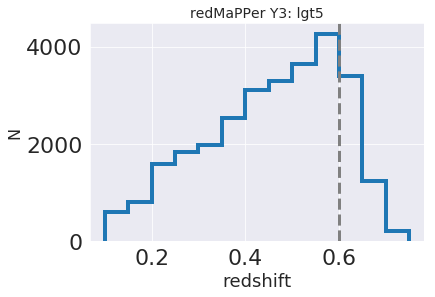

In [42]:
_ = plt.hist(zcls,bins=np.arange(0.1,0.8,0.05),histtype='step',lw=4)
plt.axvline(0.6,ls='--',lw=3,color='gray')
plt.xlabel('redshift',fontsize=18)
plt.title('redMaPPer Y3: lgt5',fontsize=14)
plt.ylabel('N',fontsize=16)

Text(0.5,0,'$\\lambda$')

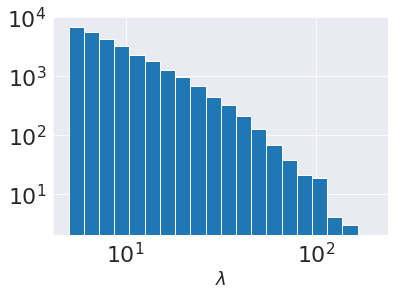

In [43]:
plt.hist(lbd,bins=np.logspace(np.log10(5),np.log10(200),21))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\lambda$',fontsize=18)

In [44]:
def sky_plot(RA,DEC,ax=None,title=''):
    if ax is None:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection="aitoff")

    ############################
    #Codigo para plotar coordenadas de objetos na esfera celeste
    #############################
    import astropy.coordinates as coord
    from astropy import units as u
    
    ra = coord.Angle(RA*u.degree)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(DEC*u.degree)

    ##############
    #Plotando os objetos
    #import astropy.coordinates as coord
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.scatter(ra.radian, dec.radian, s=10, alpha=0.5)
    ax.set_title(title,fontsize=20)
    
    plt.subplots_adjust(top=0.9,bottom=0.0)
    # ax.set_xticklabels(['10h','8h','6h','4h','2h','0h','20h','18h','16h','14h','12h'])
    
    #fig.savefig(savefig, bbox_inches = "tight")
    #plt.clf()
    #plt.close()

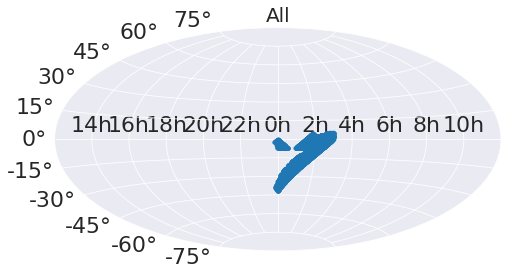

In [45]:
sky_plot(ra,dec,title='All')

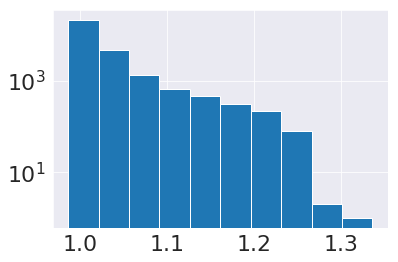

In [46]:
plt.hist(scale_v)
plt.yscale('log')

### Make Healpix Map

In [47]:
import sys

sys.path.append('../scripts/')

from helper import radec_pix, make_hpx_map

In [48]:
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster
Nside    = 8
outdir   = '../data/'
hpx_file = outdir+'hpxmap_nside%i_subsampled.fits'%Nside

In [49]:
hpx = radec_pix(ra,dec,nside=Nside)

data['tile'] = hpx


In [50]:
# r200   = cat['R200'][:]*0.7 ## Mpc
# DA     = AngularDistance(np.array(cat['redshift']))
# cat['rmax']  = 60*(float(rmax)/DA)*rad2deg ## arcmin

In [51]:
print('getting healpix map')

hpx_map = make_hpx_map(ra,dec,Nside,hpx_file)
hpx_values = np.array(hpx_map['hpx_value'])

getting healpix map
healpix map, nside 8
-> ../data/hpxmap_nside8_subsampled.fits


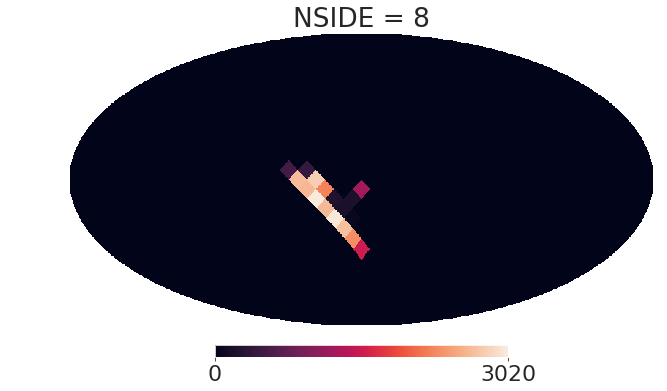

In [52]:
import healpy as hp
hp.mollview(hpx_values, nest=True, title="NSIDE = %i"%Nside)

In [53]:
print('# Tiles: ',np.count_nonzero(hpx_values>1))

('# Tiles: ', 19)


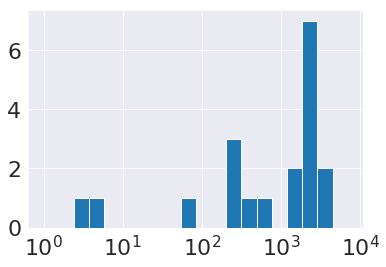

In [54]:
_ = plt.hist(hpx_map[hpx_values>1]['hpx_value'],bins=np.logspace(np.log10(1),np.log10(7000),21))
plt.xscale('log')

In [55]:
hpx_map[hpx_values>1]

hpx_pixel,hpx_value
int64,float64
1,546.0
3,3.0
257,1534.0
258,2312.0
260,5.0
261,2689.0
262,2991.0
263,69.0
264,222.0


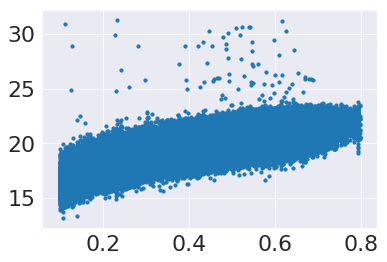

In [56]:
zmask = zgal<=0.8
plt.scatter(zgal[zmask],mmag[zmask,2],s=10)

In [57]:
np.percentile(mmag[zmask,2],98)

22.48961639404297

In [58]:
data.write(fname_out,overwrite=True, format='fits')